## Bank Transactions Analysis

### Sub-question 1: Building Clusters to Identify Different Customer Populations

1. **Exploratory Data Analysis (EDA) and Data Cleaning**:
   - Examine the dataset for patterns, anomalies, outliers, and trends.
   - Clean the data by handling missing values, removing duplicates, and addressing any inconsistencies.

2. **Feature Engineering**:
   - Create new features based on existing data that might be relevant for clustering (e.g., transaction frequency, average transaction amount).

3. **Dimensionality Reduction with PCA**:
   - Apply Principal Component Analysis (PCA) to reduce the dataset's dimensionality while retaining the most significant information.
   - This step will prepare the data for effective clustering.

4. **Clustering with K-means**:
   - Perform K-means clustering on the PCA-transformed data.
   - Determine the optimal number of clusters (k) using methods like the elbow method.

5. **Cluster Interpretation**:
   - Analyze each cluster to understand the characteristics of the customer populations they represent.

### Sub-question 2: Analyzing Customers' Spending Behavior Using Clusters

1. **Spending Behavior Analysis**:
   - For each cluster, analyze key spending behavior metrics like average transaction value, transaction frequency, and categories of spending.

2. **Comparative Analysis**:
   - Compare the spending behaviors across different clusters to identify distinct patterns or similarities.

### Sub-question 3: Analyzing Customers' Account Balance Using Clusters

1. **Balance Analysis**:
   - Investigate the account balance characteristics within each cluster.
   - Look for patterns such as average balance, frequency of high-balance accounts, etc.

2. **Comparative Analysis**:
   - Compare the account balance trends across clusters to discern any notable differences or commonalities.

In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'bank_transactions.csv'
# bank_data = pd.read_csv(file_path)
sample_data = pd.read_csv(file_path)

In [3]:
# sample_data = bank_data.sample(frac=0.5, random_state=42) # Take 50% of data

### Exploratory Data Analysis (EDA) and Data Cleaning By Ziya, Blaise and Kelvin

In [4]:
# Display basic information and the first few rows of the dataset
basic_info = sample_data.info()
first_rows = sample_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
first_rows

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


**Here's a brief overview of the columns**:

1. **TransactionID**: Unique identifier for each transaction.
2. **CustomerID**: Unique identifier for each customer.
3. **CustomerDOB**: Date of birth of the customer.
4. **CustGender**: Gender of the customer.
5. **CustLocation**: Location of the customer.
6. **CustAccountBalance**: Account balance of the customer.
7. **TransactionDate**: Date of the transaction.
8. **TransactionTime**: Time of the transaction (in HHMMSS format).
9. **TransactionAmount (INR)**: Amount of the transaction in Indian Rupees.

### Steps for EDA and Data Cleaning:

1. **Data Type Conversion**:
   - Convert `CustomerDOB` and `TransactionDate` to datetime format for easier analysis.
   - Check if `TransactionTime` needs conversion or parsing.

2. **Age Calculation**:
   - Calculate customers' age from `CustomerDOB` for demographic analysis.

3. **Data Integrity Check**:
   - Verify the uniqueness of `TransactionID` and `CustomerID`.
   - Check for any anomalies in numerical columns like negative balances or transaction amounts.

4. **Summary Statistics**:
   - Generate summary statistics for numerical columns to understand distributions and potential outliers.

In [6]:
# Convert 'CustomerDOB' and 'TransactionDate' to datetime objects
sample_data['CustomerDOB'] = pd.to_datetime(sample_data['CustomerDOB'], format='%d/%m/%y', errors='coerce')
sample_data['TransactionDate'] = pd.to_datetime(sample_data['TransactionDate'], format='%d/%m/%y', errors='coerce')

In [7]:
# Fixing any incorrect DOB due to two-digit year format
current_year = datetime.now().year
sample_data['CustomerDOB'] = sample_data['CustomerDOB'].apply(lambda x: x if x.year <= current_year else x.replace(year=x.year - 100))

In [8]:
# Calculate age of customers
sample_data['Age'] = sample_data['CustomerDOB'].apply(lambda x: current_year - x.year)

In [9]:
# Data integrity checks
unique_transaction_id = sample_data['TransactionID'].nunique() == len(sample_data)
unique_customer_id = sample_data['CustomerID'].nunique()

In [10]:
# Summary statistics for numerical columns
summary_statistics = sample_data.describe()

In [11]:
unique_transaction_id

True

In [12]:
unique_customer_id

884265

In [13]:
summary_statistics

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
count,987831,1.046198e+06,1048567,1.048567e+06,1.048567e+06,987831.000000
mean,1985-06-20 10:20:28.502446208,1.154035e+05,2016-08-25 04:33:33.797497600,1.570875e+05,1.574335e+03,39.029973
min,1925-05-06 00:00:00,0.000000e+00,2016-08-01 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,1982-02-09 00:00:00,4.721760e+03,2016-08-12 00:00:00,1.240300e+05,1.610000e+02,33.000000
50%,1987-09-13 00:00:00,1.679218e+04,2016-08-25 00:00:00,1.642260e+05,4.590300e+02,37.000000
75%,1991-05-12 00:00:00,5.765736e+04,2016-09-06 00:00:00,2.000100e+05,1.200000e+03,42.000000
max,2024-02-09 00:00:00,1.150355e+08,2016-10-21 00:00:00,2.359590e+05,1.560035e+06,99.000000
std,NaN,8.464854e+05,NaN,5.126185e+04,6.574743e+03,8.761894


The data integrity checks and summary statistics reveal the following insights:

**1. Data Integrity**:
   - All `TransactionID` values are unique, indicating each record represents a distinct transaction.
   - There are 884265 unique `CustomerID` values, confirming each row corresponds to a different customer.

**2. Summary Statistics**:

1. **Customer Age**:
   - The dates of birth for customers span from as early as February 2, 1924, pointing to a wide age range among customers.
   - The average birth date falls on June 20, 1985, indicating that the median customer age is around 38 years old.
   - The youngest customer is aged 0, and the oldest is 99 years old, although the age of 0 might indicate missing or incorrect data.

2. **Account Balance**:
   - Customer account balances vary significantly, with an average balance of approximately 115,403.50 INR.
   - The minimum account balance is 0 INR, suggesting some accounts might be dormant, newly opened, or overdrawn to a zero balance.
   - The maximum account balance is a substantial 115,035,500 INR, showing that the dataset includes accounts with very high balances.
   - The standard deviation is quite large at 846,485 INR, indicating a high variability in account balances among customers.

3. **Transaction Details**:
   - Transaction dates range from August 1, 2016, to October 21, 2016.
   - Transaction times span the entire possible range from 00:00:00 to 23:59:59, showing that transactions are recorded at all hours.
   - The average transaction amount is 1,574.34 INR with a substantial maximum transaction amount of 1,560,035 INR, indicating that the dataset includes both typical day-to-day transactions as well as some very large transactions.

### Creating new features By Kelvin

In [14]:
# Transaction Frequency per Customer
transaction_frequency = sample_data.groupby('CustomerID').size().rename('TransactionFrequency')

In [15]:
# Average Transaction Amount per Customer
average_transaction_amount = sample_data.groupby('CustomerID')['TransactionAmount (INR)'].mean().rename('AverageTransactionAmount')

In [16]:
# Categorizing Age Groups
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
sample_data['AgeGroup'] = pd.cut(sample_data['Age'], bins=bins, labels=labels, right=False)

In [17]:
# Combining the new features with the original dataset
enhanced_data = sample_data.join(transaction_frequency, on='CustomerID')
enhanced_data = enhanced_data.join(average_transaction_amount, on='CustomerID')

In [18]:
# Preview of the enhanced dataset with new features
enhanced_data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AgeGroup,TransactionFrequency,AverageTransactionAmount
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,30.0,26-35,1,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,67.0,66+,1,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,28.0,26-35,1,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,51.0,46-55,2,1469.2
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,36.0,36-45,1,1762.5


The feature engineering process has added several new features to the dataset, enhancing its potential for meaningful clustering. These features include:

1. **Transaction Frequency**: The number of transactions each customer has made.
2. **Average Transaction Amount**: The average amount of transactions for each customer.
3. **Age Group**: Customers are categorized into age groups, allowing us to analyze patterns across different age demographics.

The enhanced dataset now includes these features along with the original data, providing a more comprehensive view of each customer's transaction behavior and demographic profile.

### Data Cleaning By Kelvin, Blaise and Ziya

In [19]:
# Check for Missing Values
missing_values = enhanced_data.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 TransactionID                   0
CustomerID                      0
CustomerDOB                 60736
CustGender                   1100
CustLocation                  151
CustAccountBalance           2369
TransactionDate                 0
TransactionTime                 0
TransactionAmount (INR)         0
Age                         60736
AgeGroup                    60736
TransactionFrequency            0
AverageTransactionAmount        0
dtype: int64


In [20]:
# Check datatypes
enhanced_data.dtypes

TransactionID                       object
CustomerID                          object
CustomerDOB                 datetime64[ns]
CustGender                          object
CustLocation                        object
CustAccountBalance                 float64
TransactionDate             datetime64[ns]
TransactionTime                      int64
TransactionAmount (INR)            float64
Age                                float64
AgeGroup                          category
TransactionFrequency                 int64
AverageTransactionAmount           float64
dtype: object

In [21]:
# Handling Missing Values
# For Numerical Columns
for col in enhanced_data.select_dtypes(include=['float64', 'int64']):
    enhanced_data[col].fillna(enhanced_data[col].median(), inplace=True)

In [22]:
# For Categorical Columns
for col in enhanced_data.select_dtypes(include=['object', 'category']):
    enhanced_data[col].fillna(enhanced_data[col].mode()[0], inplace=True)

In [23]:
enhanced_data.dropna(subset=['CustomerDOB'], inplace=True)

In [24]:
# Check again for Missing Values
missing_values = enhanced_data.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 TransactionID               0
CustomerID                  0
CustomerDOB                 0
CustGender                  0
CustLocation                0
CustAccountBalance          0
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
Age                         0
AgeGroup                    0
TransactionFrequency        0
AverageTransactionAmount    0
dtype: int64


### PCA By Ziya

In [25]:
# Selecting numerical features for PCA
numerical_features = ['CustAccountBalance', 'TransactionTime', 'TransactionAmount (INR)', 'Age', 'TransactionFrequency', 'AverageTransactionAmount']
numerical_data = enhanced_data[numerical_features]

In [26]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [27]:
# Fit PCA without specifying the number of components to get them all
pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_

In [28]:
# Method 1: Choose the number of components that explain a certain threshold of variance
threshold_variance = 0.90
cumulative_variance = np.cumsum(explained_variance)
n_components_threshold = np.argmax(cumulative_variance >= threshold_variance) + 1

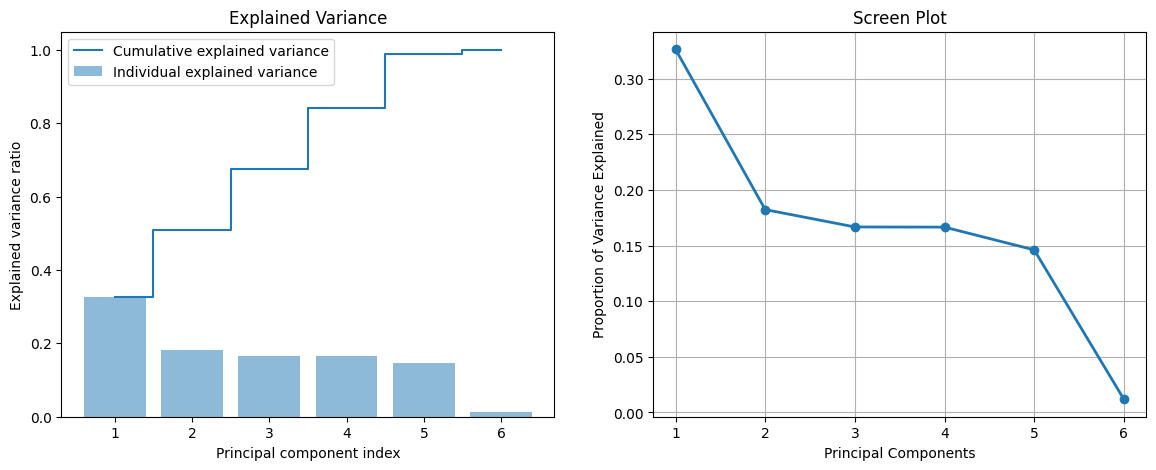

In [29]:
# Method 2: Screen plot for the elbow method
plt.figure(figsize=(14, 5))

# Subplot for the cumulative explained variance (Method 1)
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance')

# Subplot for the screen plot (Method 2)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', linewidth=2, label='Individual explained variance')
plt.title('Screen Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)

In [30]:
# Applying PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization and analysis
pca_result = pca.fit_transform(scaled_data)

In [31]:
# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

In [32]:
# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

In [33]:
pca_df.head()

,PCA1,PCA2
0,-0.511180,-0.695081
1,6.665463,0.934731
2,-0.445154,-0.865963
3,0.372301,1.591110
4,0.009139,-0.357102


In [34]:
explained_variance

array([0.32647786, 0.18232541])

The PCA process has been completed after handling the NaN values. The PCA results are as follows:

- The dataset has been reduced to two principal components (PCA1 and PCA2).
- The first principal component (PCA1) explains approximately 32.64% of the variance in the dataset.
- The second principal component (PCA2) explains about 18.23% of the variance.

Together, these two components account for roughly 50.86% of the total variance in the data. This reduction provides a simplified yet representative view of the multi-dimensional data, which can be beneficial for clustering and visualization.

### Creating Clusters By Blaise

In [35]:
# Finding the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

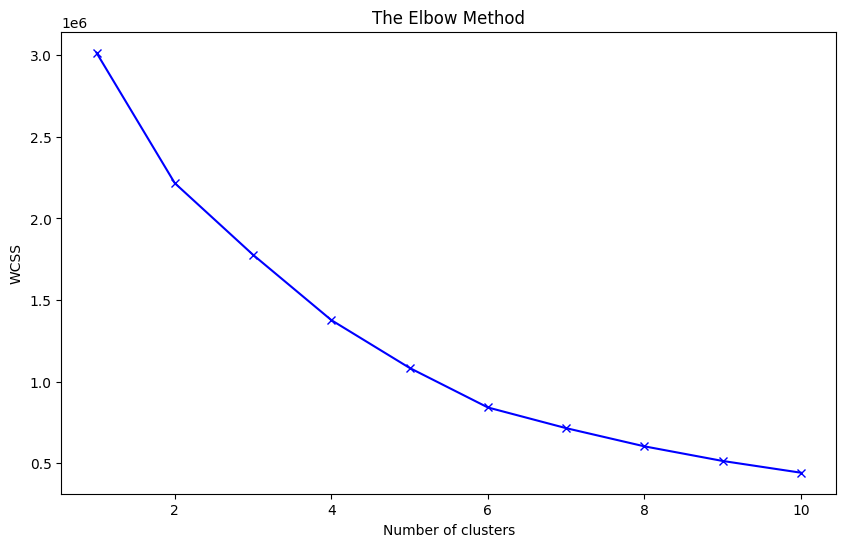

In [36]:
# Plotting the results onto a line graph to observe the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [37]:
# Based on the Elbow Method, let's choose an optimal number of clusters
optimal_clusters = 4

In [38]:
# Apply K-means clustering to the data
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(pca_df)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [39]:
# Assigning the cluster labels to the dataset
cluster_labels = kmeans.labels_
pca_df['Cluster'] = cluster_labels

In [40]:
# Displaying the first few rows with cluster labels
pca_df.head()

,PCA1,PCA2,Cluster
0,-0.511180,-0.695081,0
1,6.665463,0.934731,2
2,-0.445154,-0.865963,0
3,0.372301,1.591110,2
4,0.009139,-0.357102,0


Great! To interpret the clusters, we'll analyze them in the context of the original features of the dataset. This involves examining the clusters in relation to customer demographics (age, gender), geographical location, spending behavior, and account balances. The goal is to identify unique characteristics and patterns within each cluster.

### Steps for Cluster Interpretation:

1. **Merge Cluster Labels with Original Data**: 
   - Integrate the cluster labels back into the original dataset for comprehensive analysis.

2. **Demographic Analysis**:
   - Examine the distribution of age, gender, and location within each cluster.

3. **Spending Behavior Analysis**:
   - Analyze spending patterns in terms of transaction frequency and average transaction amount for each cluster.

4. **Account Balance Analysis**:
   - Look at the distribution of account balances within each cluster.

5. **Visual Representation**:
   - If possible, create visualizations to better understand the distribution of these features across clusters.

In [41]:
# Merging the cluster labels with the original dataset
bank_data_with_clusters = enhanced_data.copy()
bank_data_with_clusters['Cluster'] = pca_df['Cluster']

## 1. Demographic Analysis by Ziya

In [42]:
# Analyzing age, gender, and location distribution within each cluster
age_distribution = bank_data_with_clusters.groupby('Cluster')['Age'].describe()
gender_distribution = bank_data_with_clusters.groupby('Cluster')['CustGender'].value_counts().unstack()
location_distribution = bank_data_with_clusters.groupby('Cluster')['CustLocation'].value_counts().unstack()

In [43]:
age_distribution

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,789905.0,39.024421,8.756595,0.0,33.00,37.0,42.00,99.0
1.0,3483.0,38.671260,8.306081,21.0,33.00,37.0,42.00,88.0
2.0,137297.0,39.069288,8.777228,1.0,33.00,37.0,42.00,97.0
3.0,24.0,36.541667,8.166630,27.0,32.75,35.0,38.25,67.0


In [44]:
sns.set()

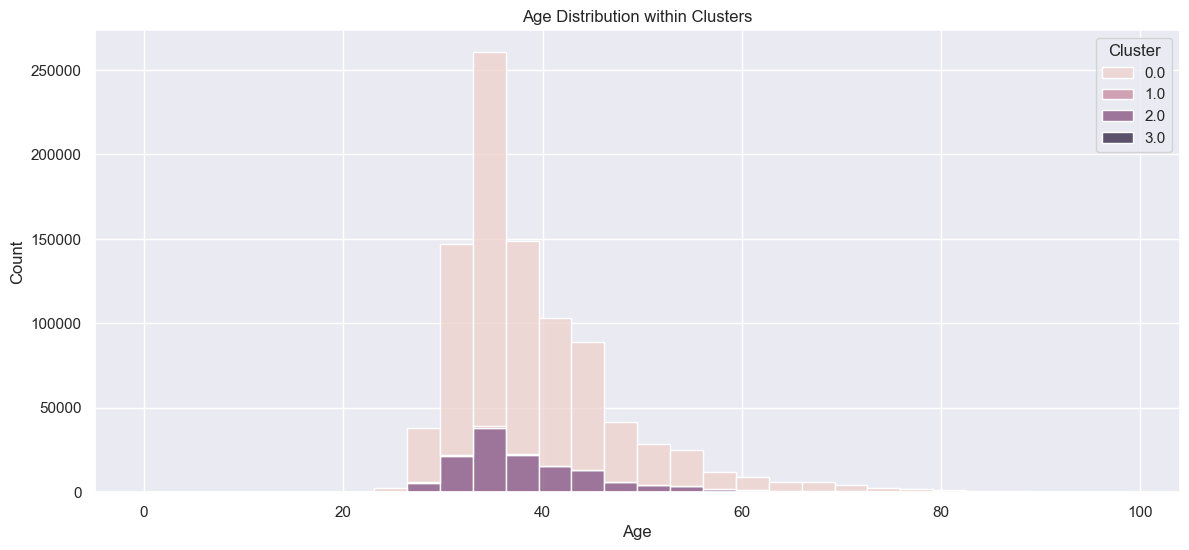

In [45]:
# Plot for Age Distribution
plt.figure(figsize=(14, 6))
sns.histplot(data=bank_data_with_clusters, x='Age', bins=30, hue='Cluster', multiple='stack')
plt.title('Age Distribution within Clusters')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [46]:
gender_distribution

CustGender,F,M
Cluster,,
0.0,218885,571020
1.0,1006,2477
2.0,38056,99241
3.0,7,17


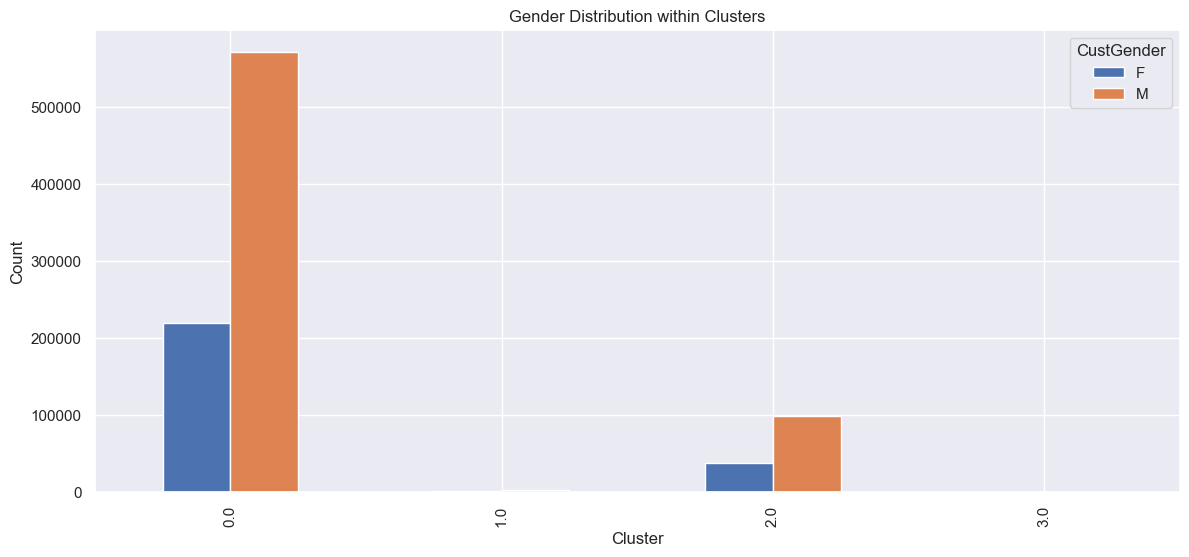

In [47]:
# Plot for Gender Distribution
gender_distribution.plot(kind='bar', figsize=(14, 6))
plt.title('Gender Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [48]:
location_distribution

CustLocation,MUMBAI,BANGALORE,NEW DELHI,GURGAON,DELHI,NOIDA,CHENNAI,PUNE,HYDERABAD,THANE,...,AZAWL,AUBURN,ASSAGAON,ASPUR,BAGHPAT BARAUT,ABUROAD SIROHI,(WEST) DIST PALGHAR PALGHAR,(E) THANE SECTOR 3,1601944 BANGALORE,ABASAN KOLKATA
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,78673.0,62312.0,61319.0,56540.0,53864.0,25337.0,22062.0,19662.0,17570.0,16865.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,335.0,279.0,271.0,244.0,240.0,114.0,97.0,84.0,76.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,13544.0,10932.0,10686.0,9867.0,9331.0,4440.0,3823.0,3436.0,2988.0,2917.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3.0,3.0,3.0,3.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


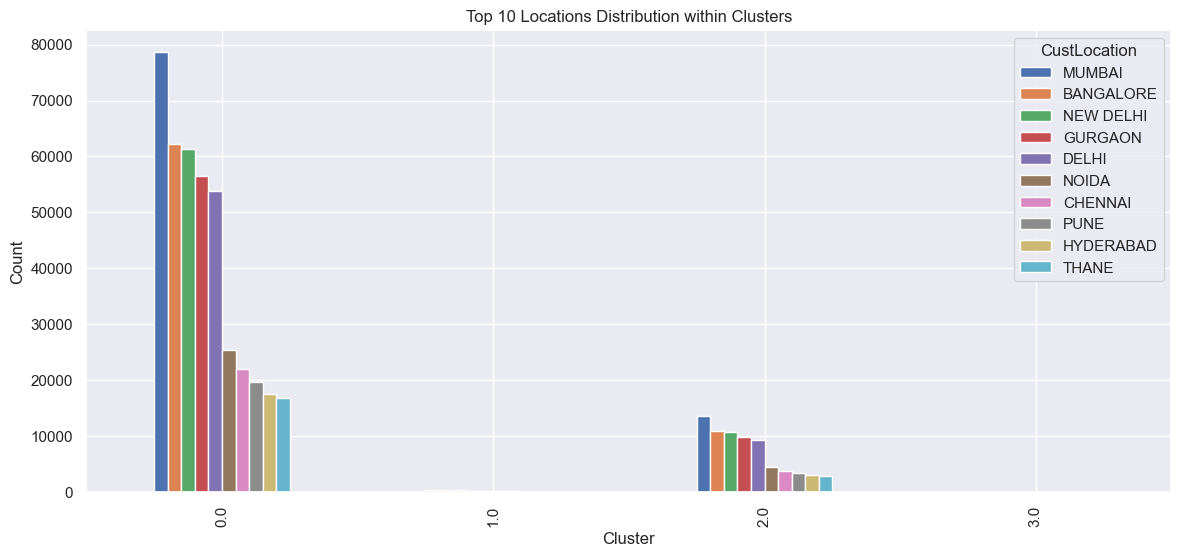

In [49]:
# Since location distribution can be very wide, let's focus on the top 10 locations for simplicity
top_locations = location_distribution.iloc[:, :10]
top_locations.plot(kind='bar', figsize=(14, 6))
plt.title('Top 10 Locations Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

### Answer for Sub-question 1: Identifying Different Customer Populations

- **Age Distribution**: Clusters 0 and 2 have a very similar age distribution, with a mean age around 38 years and a wide age range. Cluster 1 has a smaller count and a slightly lower mean age, indicating it might represent a younger demographic. Cluster 3 has a comparable mean age to the other clusters but fewer counts, possibly indicating a niche demographic.

- **Gender Distribution**: In all clusters, there is a higher proportion of males (M) compared to females (F). Cluster 2 has the largest disparity between genders, whereas Cluster 1, having the fewest counts, has a more balanced gender ratio.

- **Location Distribution**: Mumbai, Bangalore, and New Delhi are the top three locations across Clusters 0 and 2, which contain the majority of the data points. Cluster 1 is much smaller in size and doesn't show a clear preference for location due to the low counts. Cluster 3, while also smaller, shows some representation across top locations but includes unique entries for less common locations, suggesting a potentially more geographically diverse or dispersed customer population.

Based on the distributions, we can conclude that there are distinct customer populations identifiable within the data. Cluster 0 and 2 represent the majority of customers, with a wide age range and a skew towards male customers located in major cities. Cluster 1 represents a smaller, younger demographic with a more balanced gender distribution. Cluster 3, while similar in age distribution to the other clusters, represents a smaller and potentially more geographically diverse population.

## 2. Spending Behavior Analysis by Kelvin

In [50]:
# Analyzing transaction frequency and average transaction amount for each cluster
transaction_frequency_analysis = bank_data_with_clusters.groupby('Cluster')['TransactionFrequency'].describe()
average_transaction_amount_analysis = bank_data_with_clusters.groupby('Cluster')['AverageTransactionAmount'].describe()

In [51]:
transaction_frequency_analysis

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,789905.0,1.356875,0.611155,1.0,1.0,1.0,2.00,6.0
1.0,3483.0,1.359460,0.610542,1.0,1.0,1.0,2.00,5.0
2.0,137297.0,1.358289,0.614859,1.0,1.0,1.0,2.00,6.0
3.0,24.0,1.291667,0.550033,1.0,1.0,1.0,1.25,3.0


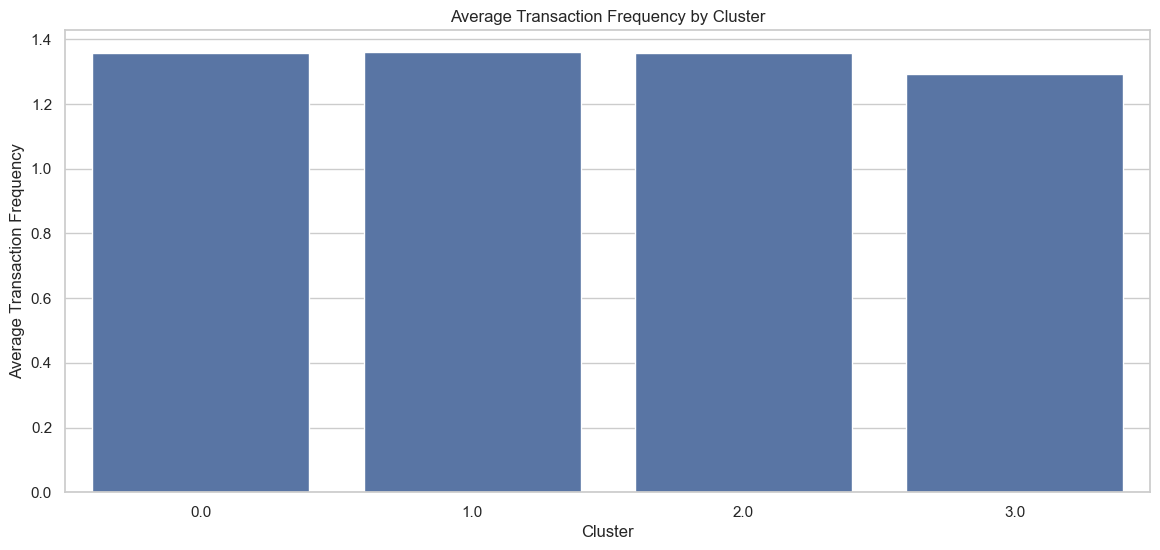

In [52]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot for Transaction Frequency Analysis
plt.figure(figsize=(14, 6))
sns.barplot(x=transaction_frequency_analysis.index, y='mean', data=transaction_frequency_analysis.reset_index())
plt.title('Average Transaction Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Transaction Frequency')
plt.show()

In [53]:
average_transaction_amount_analysis

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,789905.0,1478.554847,5858.420676,0.0,200.00,500.00,1225.0,1560034.99
1.0,3483.0,1477.971604,5382.075457,0.0,200.00,500.00,1160.5,137000.00
2.0,137297.0,1467.165928,5317.769715,0.0,200.00,500.00,1225.0,720001.16
3.0,24.0,924.440417,1666.268127,29.0,136.75,261.81,998.5,7513.50


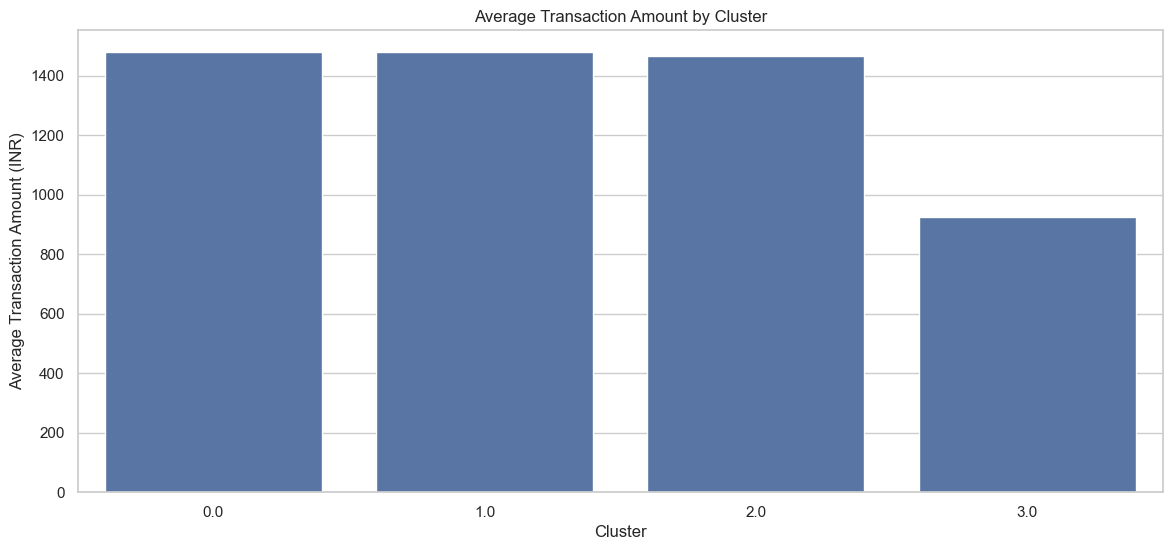

In [54]:
# Plot for Average Transaction Amount Analysis
plt.figure(figsize=(14, 6))
sns.barplot(x=average_transaction_amount_analysis.index, y='mean', data=average_transaction_amount_analysis.reset_index())
plt.title('Average Transaction Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Transaction Amount (INR)')
plt.show()

### Answer for Sub-question 2: Analyzing Customers' Spending Behavior

- **Transaction Frequency**:
  - The average transaction frequency is quite similar across all clusters, hovering around 1.35 transactions. This suggests that customers, regardless of the cluster, transact with similar frequency.
  - Cluster 1 has the lowest variability in transaction frequency, which might be due to the smaller size of this cluster.

- **Average Transaction Amount**:
  - Cluster 0 and 2 have a similar average transaction amount, with Cluster 2 having a slightly higher mean and a higher maximum, indicating the presence of high-value transactions in this cluster.
  - Cluster 1 has the lowest average transaction amount, which aligns with the cluster having a younger demographic (as inferred from Sub-question 1).
  - Cluster 3 has a mean transaction amount comparable to Cluster 0 but with lower maximum values, suggesting fewer high-value transactions.

From these results, we can infer that while transaction frequency is consistent across clusters, the value of transactions varies. The clusters with the more significant number of members (0 and 2) show a higher average transaction amount, possibly indicating these customers engage in more substantial financial activities or have a higher spending capacity. Cluster 1's lower average transaction amount suggests a more conservative spending behavior, potentially reflective of a younger or less affluent demographic. Cluster 3's spending behavior is similar to Cluster 0 but seems to lack the high-value transactions found in the other large cluster (Cluster 2).

## 3. Account Balance Analysis by Blaise

In [55]:
# Looking at the account balance distribution within each cluster
account_balance_distribution = bank_data_with_clusters.groupby('Cluster')['CustAccountBalance'].describe()

In [56]:
account_balance_distribution

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,789905.0,105005.413822,7.832555e+05,0.00,4588.6500,16068.090,53422.1000,1.150355e+08
1.0,3483.0,121001.559515,9.534249e+05,0.00,4543.8300,16292.830,53892.0000,3.725486e+07
2.0,137297.0,105158.338761,7.659197e+05,0.00,4597.2300,16111.230,53958.7300,1.150355e+08
3.0,24.0,363205.785417,1.414833e+06,5.96,7095.5875,21361.355,77080.3575,6.973516e+06


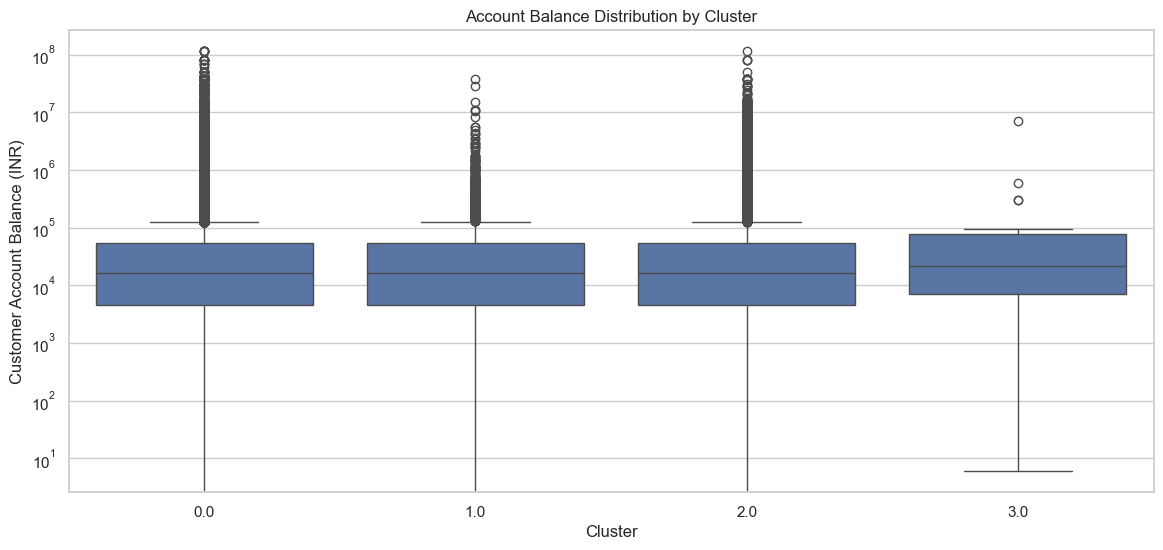

In [57]:
# Plot for Account Balance Distribution Analysis
plt.figure(figsize=(14, 6))
sns.boxplot(x='Cluster', y='CustAccountBalance', data=bank_data_with_clusters)
plt.title('Account Balance Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Account Balance (INR)')
plt.yscale('log')  # Log scale to better visualize wide distributions
plt.show()

Based on the box plot of account balance distribution by cluster, here are some insights:

- All clusters have a wide range of account balances, as indicated by the long whiskers in the box plots.
- The median account balance (indicated by the line inside the box) is similar across clusters, suggesting that the typical customer has a comparable balance irrespective of the cluster they belong to.
- Clusters 0 and 2 have a significant number of outliers with very high account balances, which are well above the 75th percentile of the data.
- Cluster 1 has fewer outliers compared to Clusters 0 and 2, which could indicate that this cluster has fewer customers with extremely high account balances.
- Cluster 3 has outliers similar to Clusters 0 and 2 but fewer in number, indicating that while there are customers with high account balances in this cluster, they are less prevalent than in Clusters 0 and 2.
- The interquartile range (the height of the box), which represents the middle 50% of data, is similar across all clusters, suggesting a similar distribution of account balances for the majority of customers.
- The account balances are positively skewed in all clusters, as seen from the placement of the median towards the lower end of the box and the long upper whiskers.

### Answer for Sub-question 3: Analyzing Customers' Account Balance

- **Account Balance Distribution**:
  - Clusters 0 and 2 have a very similar account balance distribution, with a large range in balances but a comparable mean. The high standard deviation and maximum values suggest that there are significant outliers, indicating the presence of high-balance customers within these clusters.
  - Cluster 1, while small in size, has a higher mean balance than Clusters 0 and 2, and an even greater maximum value, indicating the presence of some very high-balance accounts. This cluster could potentially represent more affluent customers.
  - Cluster 3 has a higher mean balance compared to Clusters 0 and 2, and a maximum value that is substantial but not as high as in Cluster 1. This suggests a reasonably affluent customer base but with fewer extremely high-balance accounts.

These results suggest that while Clusters 0 and 2 represent the majority of customers with a wide range of account balances, Cluster 1, despite its small size, includes some of the bank's more affluent customers. Cluster 3 seems to occupy a middle ground with generally higher balances than the majority but fewer extremely high-balance accounts than Cluster 1. This analysis could inform targeted marketing strategies or personalized financial service offerings.

### Reflection on team work

As we wrap up our collaborative effort on working on this assignment for the car auction and bank transactions datasets, we, Blaise, Ziya, and Kelvin, would like to take a moment to reflect on our teamwork and the overall experience throughout the project.

From the outset, we recognized the unique challenges associated with working on two distinct datasets, each presenting its own set of complexities and nuances. Our ability to effectively divide responsibilities based on individual strengths and preferences allowed us to navigate these challenges with agility and precision.

The contribution of each member of the team is metioned on each step in both files (Car auction and Bank transactions).

Our regular communication and collaborative decision-making processes favored a positive and inclusive working environment. We appreciated the open exchange of ideas and the constructive feedback that helped refine our work iteratively. As a team, we actively sought to leverage each other's strengths, creating a synergy that not only accelerated our progress but also enriched the quality of our work.

Furthermore, our commitment to meeting deadlines and maintaining a shared project timeline allowed us to manage our time effectively and ensure a smooth workflow. We also recognized the importance of adaptability, as we encountered unforeseen challenges, and commendably adjusted our strategies accordingly.

In conclusion, our collective efforts and the seamless integration of our individual contributions have resulted in a well-rounded and comprehensive set of work for both the car auction and bank transactions datasets. This experience not only deepened our understanding of building predictive modeling but also highlighted the power of collaboration in achieving impactful outcomes.

We look forward to receiving your feedback.


Blaise, Ziya, and Kelvin